# Практична робота №7
### Студента групи МІТ-31
### Переверзева Олексія

#### Бінарна класифікація

In [142]:
from sklearn.datasets import make_classification
import pandas as pd

n_features=2

X, y = make_classification(
    n_samples=1000,
    n_features=n_features,
    n_informative=2,
    n_redundant=0,
    n_classes=2, 
    class_sep=10,
    random_state=44
)

data = pd.DataFrame(X, columns = [f"Subject {i+1}" for i in range(n_features)])
data['Target'] = y

data.to_csv('binary_classification.csv', index=False)

data

,Subject 1,Subject 2,Target
0,9.503821,-8.760774,1
1,11.570519,-6.886962,1
2,8.888221,-9.277295,1
3,8.566845,-9.998605,1
4,10.039704,10.168236,1
...,...,...,...
995,-9.773030,-9.291903,0
996,-10.022307,-9.940580,0
997,-10.288197,10.059623,0
998,-10.167713,-11.492851,0


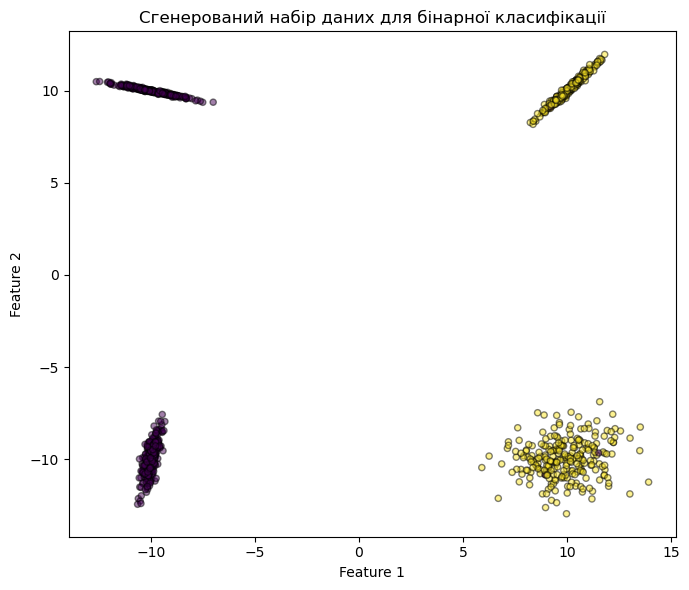

In [143]:
# Відобразимо створений набір даних
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, alpha=0.5, edgecolors='k')
plt.title('Сгенерований набір даних для бінарної класифікації')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

bc_model = Sequential([
  Dense(10, activation='relu', input_shape=(X.shape[1],)),
  Dense(10, activation='relu'),
  Dense(1, activation='sigmoid')
])

bc_model.compile(loss="binary_crossentropy",
                optimizer='adam',
                metrics=['accuracy'])

bc_results = bc_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 0.6762 - accuracy: 0.7325 - val_loss: 0.5555 - val_accuracy: 0.7000
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.7563 - val_loss: 0.3349 - val_accuracy: 0.7000
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9150 - val_loss: 0.2134 - val_accuracy: 0.9950
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9950 - val_loss: 0.1735 - val_accuracy: 0.9950
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9950 - val_loss: 0.1399 - val_accuracy: 0.9950
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.9950 - val_loss: 0.1131 - val_accuracy: 0.9950
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9950 - val_loss: 0.0918 - val_accuracy: 0.9950
Epoch 8/50
25/25 [==

In [146]:
bc_test_loss, bc_test_accuracy = bc_model.evaluate(X_test, y_test)
print(f"Втрати моделі бінарної класифікації на тестових даних: {bc_test_loss}")
print(f"Точність моделі бінарної класифікації на тестових даних: {100*bc_test_accuracy:.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9950
Втрати моделі бінарної класифікації на тестових даних: 0.037739962339401245
Точність моделі бінарної класифікації на тестових даних: 99.50%


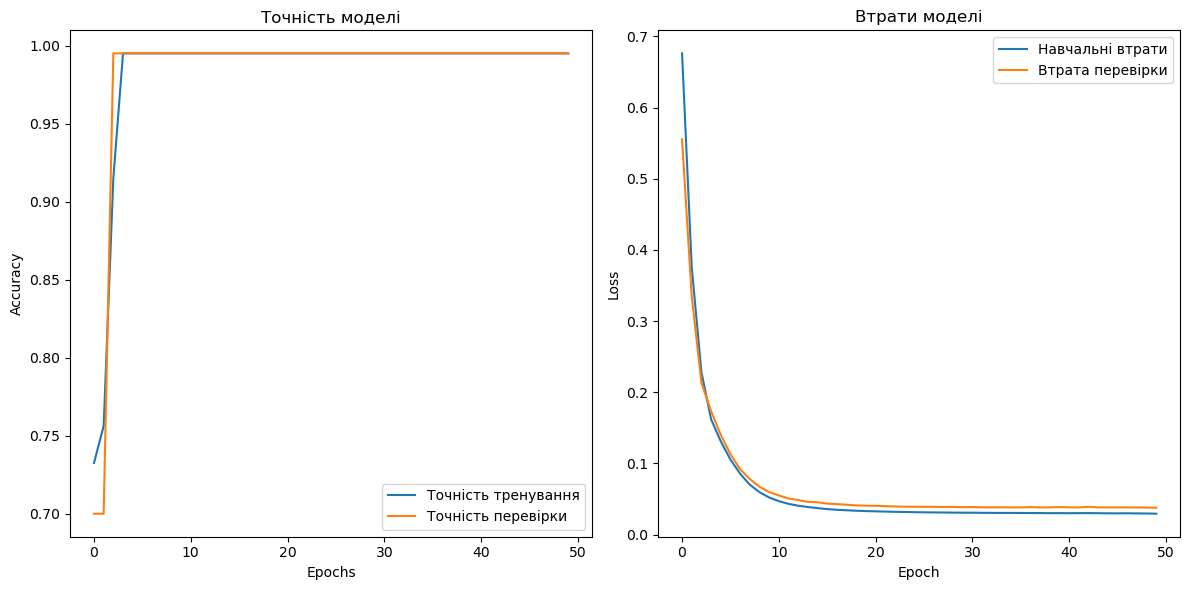

In [147]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bc_results.history['accuracy'], label='Точність тренування')
plt.plot(bc_results.history['val_accuracy'], label='Точність перевірки')
plt.title('Точність моделі')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(bc_results.history['loss'], label='Навчальні втрати')
plt.plot(bc_results.history['val_loss'], label='Втрата перевірки')
plt.title('Втрати моделі')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

#### Мультикласова класифікація

In [148]:
n_features=2

X, y = make_classification(
    n_samples=1000,
    n_features=n_features,
    n_informative=2,
    n_redundant=0,
    n_classes=3, 
    class_sep=10,
    n_clusters_per_class=1,
    random_state=44
)

data = pd.DataFrame(X, columns = [f"Feature {i+1}" for i in range(n_features)])
data['Target'] = y

data.to_csv('multiclass_classification.csv', index=False)

data

,Feature 1,Feature 2,Target
0,9.330839,-9.877813,2
1,9.838410,8.985056,0
2,10.500890,-10.038202,2
3,9.969706,10.458372,0
4,-8.174806,9.420985,1
...,...,...,...
995,10.155072,-10.015730,2
996,11.580283,-10.298009,2
997,-9.334033,10.110799,1
998,10.108441,10.911944,0


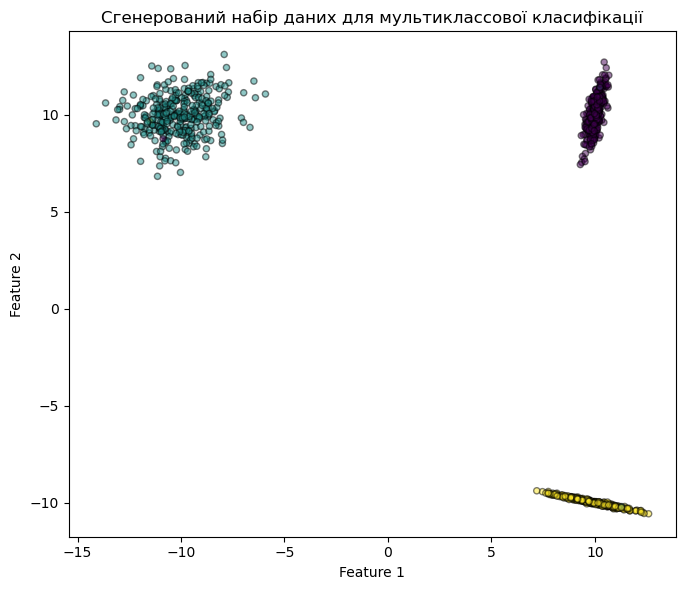

In [149]:
# Відобразимо створений набір даних

plt.figure(figsize=(20, 6))
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, alpha=0.5, edgecolors='k')
plt.title('Сгенерований набір даних для мультиклассової класифікації')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

mc_model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

mc_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=["accuracy"])

mc_history = mc_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
25/25 [==============================] - 1s 8ms/step - loss: 0.9031 - accuracy: 0.6875 - val_loss: 0.7619 - val_accuracy: 0.5750
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.6888 - val_loss: 0.4673 - val_accuracy: 0.5750
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3675 - accuracy: 0.6888 - val_loss: 0.4122 - val_accuracy: 0.5750
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.6975 - val_loss: 0.3632 - val_accuracy: 0.9650
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.9900 - val_loss: 0.3082 - val_accuracy: 1.0000
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.9925 - val_loss: 0.2504 - val_accuracy: 1.0000
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9925 - val_loss: 0.1888 - val_accuracy: 1.0000
Epoch 8/50
25/25 [==

In [151]:
mc_test_loss, mc_test_acc = mc_model.evaluate(X_test, y_test)
print(f"Втрати моделі мультиклассової класифікації на тестових даних: {mc_test_loss}")
print(f"Точність моделі мультиклассової класифікації на тестових данихt: {100*mc_test_acc:.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 1.0000
Втрати моделі мультиклассової класифікації на тестових даних: 0.009635306894779205
Точність моделі мультиклассової класифікації на тестових данихt: 100.00%


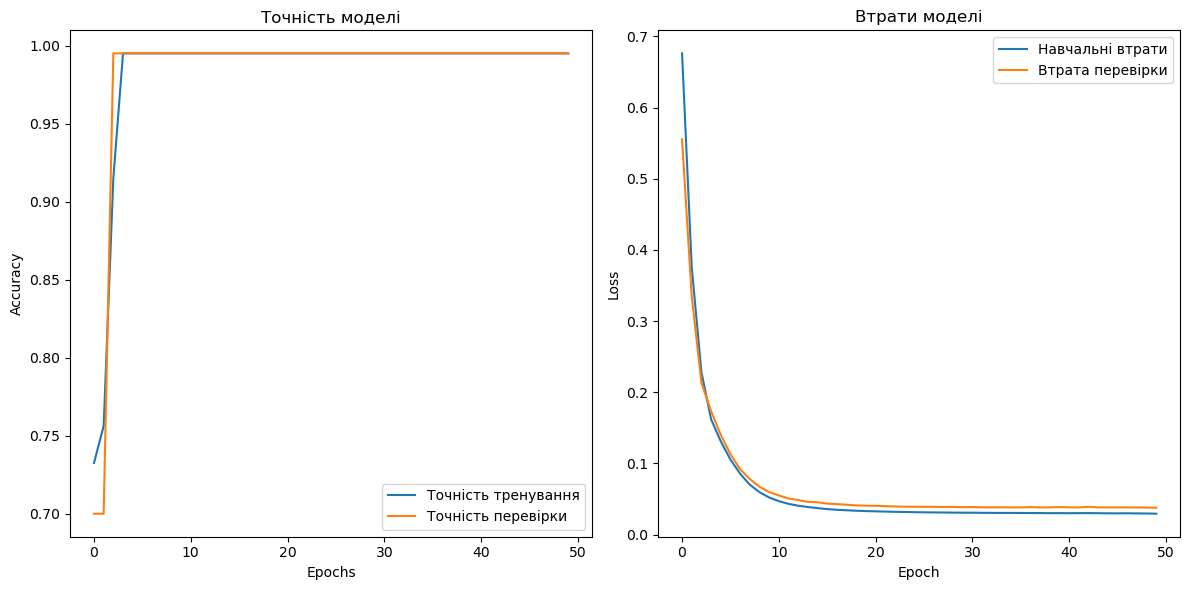

In [152]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bc_results.history['accuracy'], label='Точність тренування')
plt.plot(bc_results.history['val_accuracy'], label='Точність перевірки')
plt.title('Точність моделі')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(bc_results.history['loss'], label='Навчальні втрати')
plt.plot(bc_results.history['val_loss'], label='Втрата перевірки')
plt.title('Втрати моделі')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()